<a href="https://colab.research.google.com/github/Akifdatascience/Subasedata_Customer_chain/blob/main/Sunbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**




In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

**Load the data**

In [4]:
df = pd.read_excel(r"C:\Users\Akif\customer_churn.xlsx")

In [4]:

df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


 **EDA**

---



**First of all, drop customerID and Nmae columns as it is of no use**

In [5]:
columns=["CustomerID","Name"]
df.drop(columns,axis=1,inplace=True)

In [ ]:
df.dtypes


Age                             int64
Gender                          int64
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:

df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]
Gender: ['Male' 'Female']
Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Subscription_Length_Months: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]
Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]
Total_Usage_GB: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 109 286 283 230 491 274
 335 462 407 126 199 351 261 496 480 400 303 197 181 474

<ipython-input-43-66d5545c9c47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


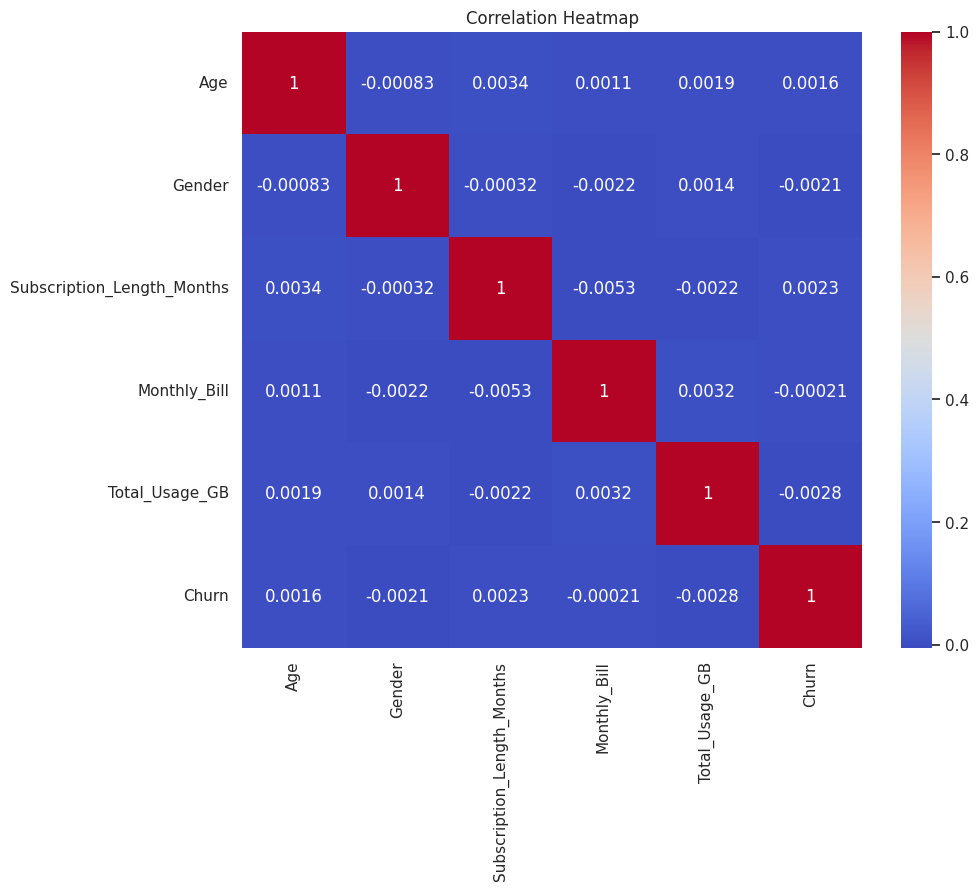

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Data Visualization**

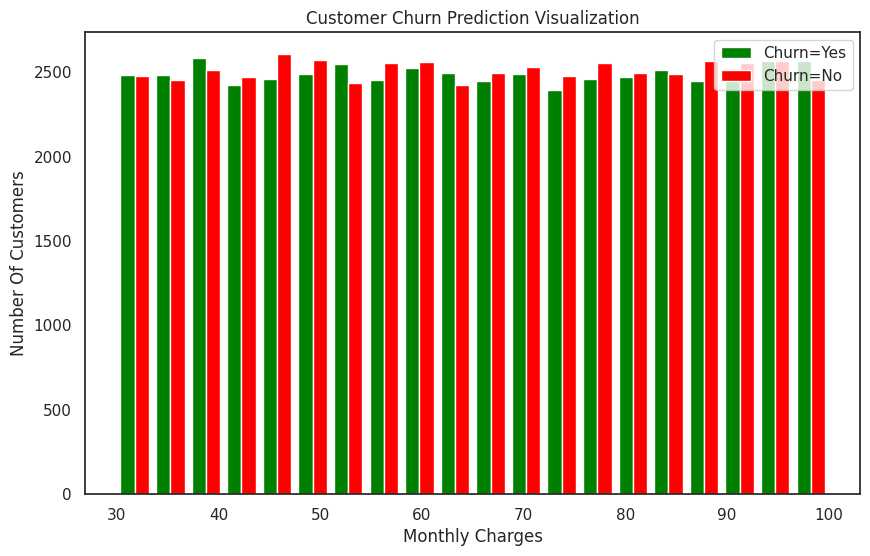

In [ ]:
# Set style to remove grid
sns.set(style="white")

# Filter Monthly Charges for Churn=No and Churn=Yes
mc_churn_no = df[df['Churn'] == 0]['Monthly_Bill']
mc_churn_yes = df[df['Churn'] == 1]['Monthly_Bill']

# Set up the plot
plt.figure(figsize=(10, 6))
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

# Create the histogram
plt.hist([mc_churn_yes, mc_churn_no], bins=20, rwidth=0.8, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.show()


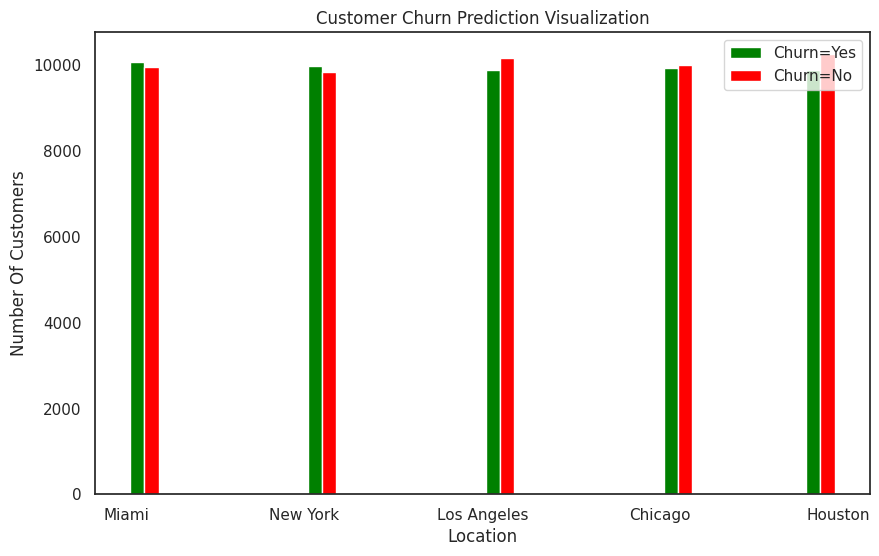

In [ ]:
sns.set(style="white")

# Filter Monthly Charges for Churn=No and Churn=Yes
mc_churn_no = df[df['Churn'] == 0]['Location']
mc_churn_yes = df[df['Churn'] == 1]['Location']

# Set up the plot
plt.figure(figsize=(10, 6))
plt.xlabel("Location")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")



# Create the histogram
plt.hist([mc_churn_yes, mc_churn_no], bins=20, rwidth=0.8, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.show()


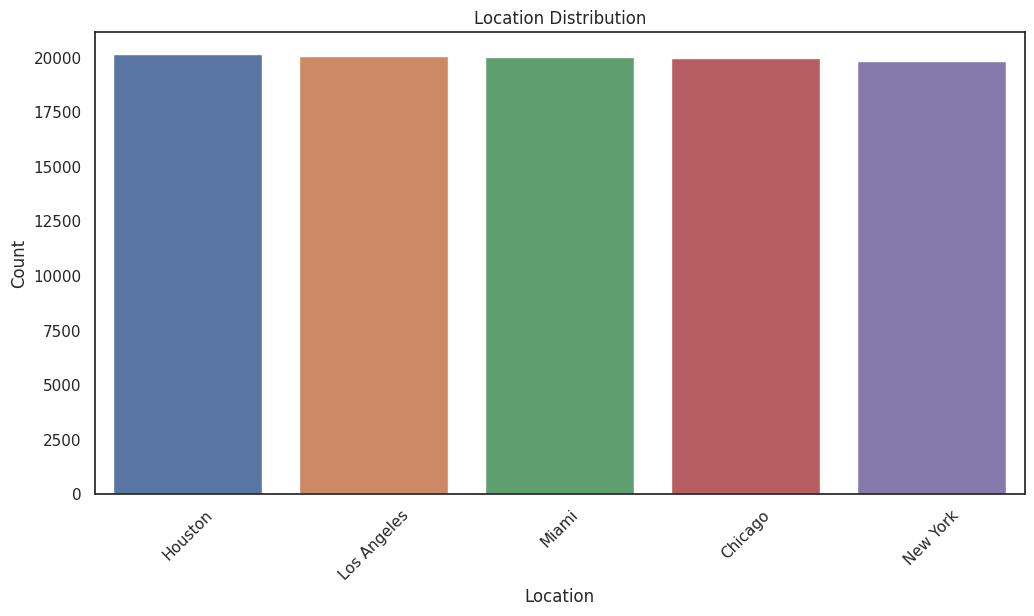

In [ ]:
# Plot Location distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**label encoding for categorical column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Location', 'Gender']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Loop through categorical columns and apply LabelEncoder
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])




Scaling down values of selected columns in the DataFrame using Min-Max Scaling


In [10]:

cols_to_scale = ['Subscription_Length_Months','Total_Usage_GB','Monthly_Bill','Age']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [12]:
df


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0.865385,1,2,0.695652,0.619429,0.413333,0
1,0.846154,0,4,0.000000,0.268000,0.271111,0
2,0.115385,0,2,0.173913,0.792429,0.911111,0
3,0.346154,0,3,0.086957,0.970571,0.548889,1
4,0.538462,0,3,0.782609,0.402000,0.480000,0
...,...,...,...,...,...,...,...
99995,0.288462,1,1,0.956522,0.359000,0.391111,1
99996,0.846154,0,4,0.782609,0.452143,0.668889,0
99997,0.884615,1,0,0.695652,0.944429,0.446667,1
99998,0.634615,0,4,0.826087,0.275000,0.853333,1


**Checking the Value count of target variable**

In [11]:
df["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

**Train test split**

In [13]:
X=df.drop("Churn",1)
y=df.Churn

C:\Users\Akif\AppData\Local\Temp\ipykernel_12832\10801208.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df.drop("Churn",1)


In [14]:
X

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,0.865385,1,2,0.695652,0.619429,0.413333
1,0.846154,0,4,0.000000,0.268000,0.271111
2,0.115385,0,2,0.173913,0.792429,0.911111
3,0.346154,0,3,0.086957,0.970571,0.548889
4,0.538462,0,3,0.782609,0.402000,0.480000
...,...,...,...,...,...,...
99995,0.288462,1,1,0.956522,0.359000,0.391111
99996,0.846154,0,4,0.782609,0.452143,0.668889
99997,0.884615,1,0,0.695652,0.944429,0.446667
99998,0.634615,0,4,0.826087,0.275000,0.853333


In [14]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Building a model (ANN) in tensorflow/keras**

In [16]:
import tensorflow as tf
from tensorflow import keras

# Define Leaky ReLU activation
def leaky_relu(x, alpha=0.01):
    return tf.maximum(alpha * x, x)

# Your input shape size
input_shape = (6,)

model = keras.Sequential([
    keras.layers.Dense(6, input_shape=input_shape, activation=leaky_relu),  # Leaky ReLU
    keras.layers.Dense(16, activation=leaky_relu),  # Leaky ReLU
    keras.layers.Dense(8, activation=leaky_relu),   # Leaky ReLU
    keras.layers.Dense(4, activation=leaky_relu),   # Leaky ReLU

    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have X_train and y_train
model.fit(X_train, y_train, epochs=20)


Epoch 1/20
2500/2500 [==============================] - 7s 2ms/step - loss: 0.6933 - accuracy: 0.4996
Epoch 2/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5011
Epoch 3/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5020
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 7/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5015
Epoch 8/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 9/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5035
Epoch 10/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.693

In [18]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5015


[0.693138599395752, 0.5014500021934509]

In [19]:

yp = model.predict(X_test)
yp[:5]


625/625 [==============================] - 1s 2ms/step


array([[0.4942436 ],
       [0.5056529 ],
       [0.49737826],
       [0.50596285],
       [0.49905238]], dtype=float32)

In [20]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [21]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 1, 1]

In [22]:
y_test[:10]

75721    0
80184    0
19864    0
76699    1
92991    0
76434    1
84004    0
80917    0
60767    0
50074    1
Name: Churn, dtype: int64

**Classification Report**

In [23]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56     10079
           1       0.50      0.37      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



**Confusion Matrix**

Text(95.72222222222221, 0.5, 'Truth')

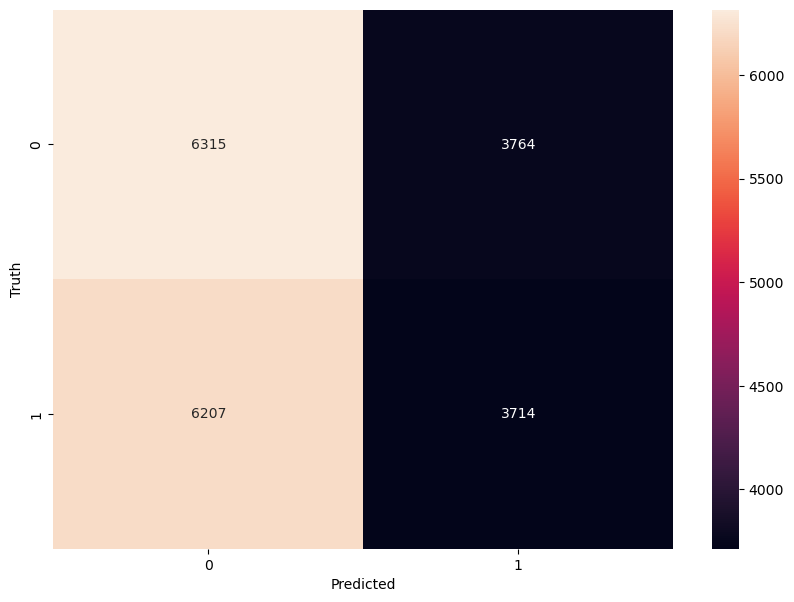

In [24]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Saving Our model**

In [25]:
tf.keras.models.save_model(model,'my_model.hdfs')

INFO:tensorflow:Assets written to: my_model.hdfs\assets


INFO:tensorflow:Assets written to: my_model.hdfs\assets
